In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('/home/palnika-chavan/Downloads/Dataset/economic_stat1.csv')
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2000,11,5.23,4.73,1306.83
1,2001,2,6.65,6.93,1000.00
2,2002,1,6.11,4.84,1158.59
3,2003,12,4.75,7.09,1396.10
4,2004,5,7.81,9.28,1044.39


In [50]:
# drop unnecessary columns
df.drop(columns = ['year', 'month'] ,axis = 1, inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,5.23,4.73,1306.83
1,6.65,6.93,1000.00
2,6.11,4.84,1158.59
3,4.75,7.09,1396.10
4,7.81,9.28,1044.39


In [51]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

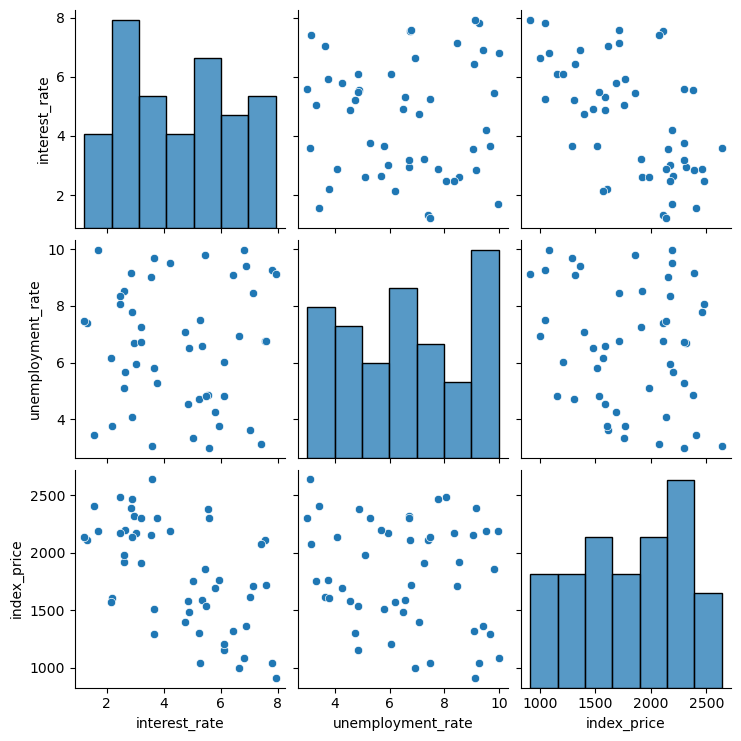

In [52]:
sns.pairplot(df)

In [53]:
#independant and dependant features
X = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']

In [54]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 10)

<AxesSubplot: xlabel='interest_rate', ylabel='index_price'>

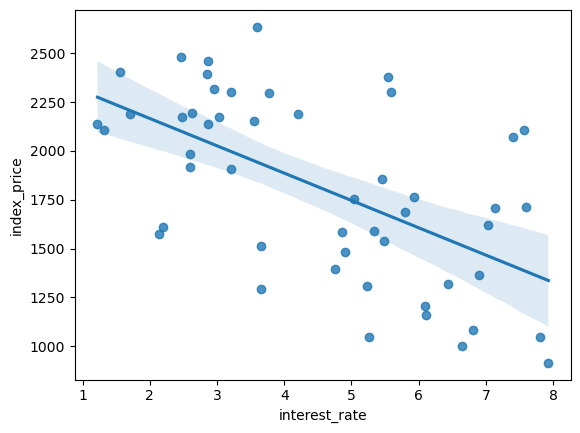

In [55]:
# regplot - > plots data and a linear regression model fit
sns.regplot(x = df['interest_rate'], y =df['index_price'])

<AxesSubplot: xlabel='unemployment_rate', ylabel='index_price'>

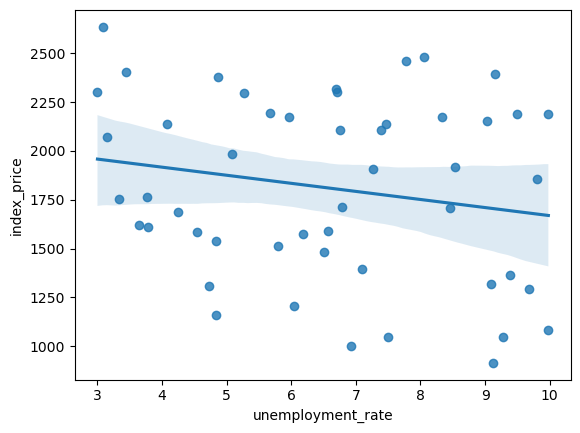

In [56]:
sns.regplot(x = df['unemployment_rate'], y = df['index_price'])

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
## Cross validation

from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv = 3)


In [64]:
np.mean(validation_score)

-151449.64203393622

In [65]:
#prediction
y_pred = model.predict(x_test)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE :", mse)
print("MAE :", mae)
print("RMSE :", rmse)
print("Score :", score)

MSE : 129695.74990907894
MAE : 323.14074269770765
RMSE : 360.1329614310233
Score : 0.31023492649754925


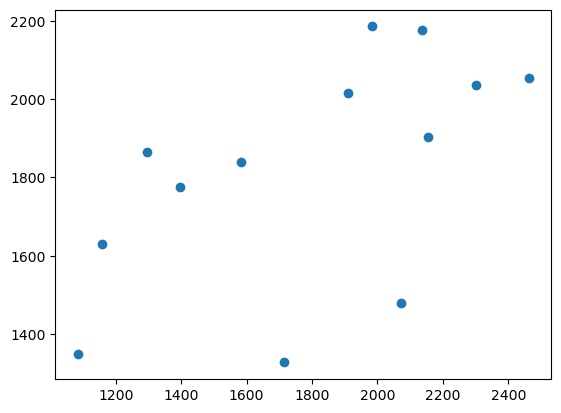

In [69]:
plt.scatter(y_test, y_pred)

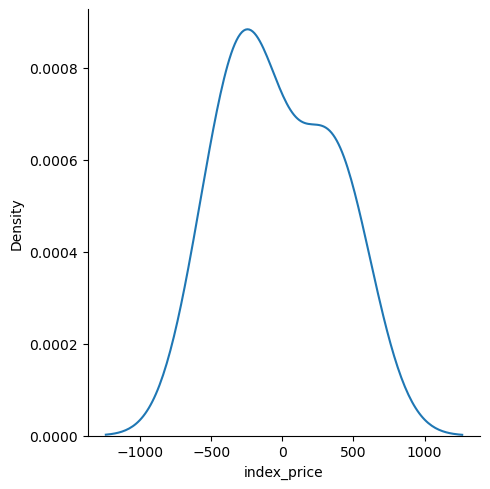

In [73]:
residuals = y_test - y_pred
sns.displot(residuals, kind = 'kde')

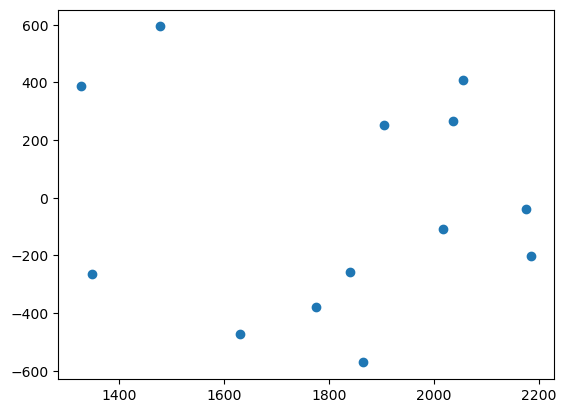

In [74]:
# scatter plot wrt predicitons and residuals

plt.scatter(y_pred, residuals)